## Problem Objective


### To predict the median housing price in any district/block in california, given all the other metrics.

### Districts/ block : smallest geographical units(a block group typically has a population of 600 to 3,000 people). 

There are 20,640 districts in the project dataset.

### Importing Necessary libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Importing dataset

In [12]:
df = pd.read_csv('E:\\ml_revision\\regularizaiton\\datasets\\1553768847-housing.csv')

## Dataset Introduction 

longitude (signed numeric - float) : Longitude value for the block in California, USA


latitude (numeric - float ) : Latitude value for the block in California, USA


housing_median_age (numeric - int ) : Median age of the house in the block


total_rooms (numeric - int ) : Count of the total number of rooms (excluding bedrooms) in all houses in the block


total_bedrooms (numeric - float ) : Count of the total number of bedrooms in all houses in the block


population (numeric - int ) : Count of the total number of population in the block


households (numeric - int ) : Count of the total number of households in the block


median_income (numeric - float ) : Median of the total household income of all the houses in the block


ocean_proximity (numeric - categorical ) : Type of the landscape of the block [ Unique Values : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND' ]


median_house_value (numeric - int ) : Median of the household prices of all the houses in the block

_

In [19]:
# check first 5 rows of the dataset
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


* Here median_house_value is the output column and rest are input columns.

* Median_house_value tell use the median price of houses in the specific block in the state

In [22]:
# Getting the information about the dataset 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


### Categorical colums :

Here in the dataset, only a single column 'ocean_proximity' is categorical.

It is having categories as : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND' 

In [25]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [23]:
# Check for the null values
df.isnull().sum()
# 207 null values are present in the column 'total_bedrooms'

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

### In order to handel the missing values, we can fill it with the help of : 

- Mean -> Average of all values present in the feature.

- Median -> Middle value of the all values present.

- Mode -> Here, we uses most repeating value in the dataset to fill in vaccant places.

- Arbitary value -> Sometime, it is useful to place relatable arbitary value in vaccant places to have better distribution of data and to obtain better results.

### Here in this case we will use the mean of the column to fill the missing values that feature.

Because, as u see data is some what distributed normally (although right skewed).

<Axes: xlabel='total_bedrooms', ylabel='Count'>

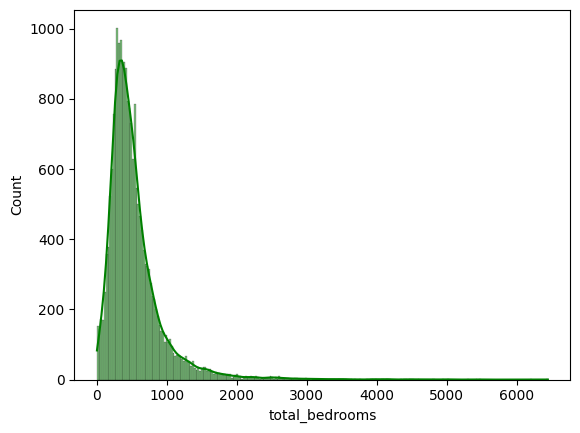

In [28]:
sns.histplot(df['total_bedrooms'], kde=True, color= 'Green')

In [26]:
# Mean value of the column : 
df['total_bedrooms'].mean()

537.8705525375618

In [27]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)

C:\Users\Aditya\AppData\Local\Temp\ipykernel_22368\1492620623.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)


In [31]:
# Thus we dont have any missing value in the whole dataset
df.isnull().sum().sum()

0

### Analyzing the data

Statistical measurement of the data

In [32]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Visualize the distribution of the features

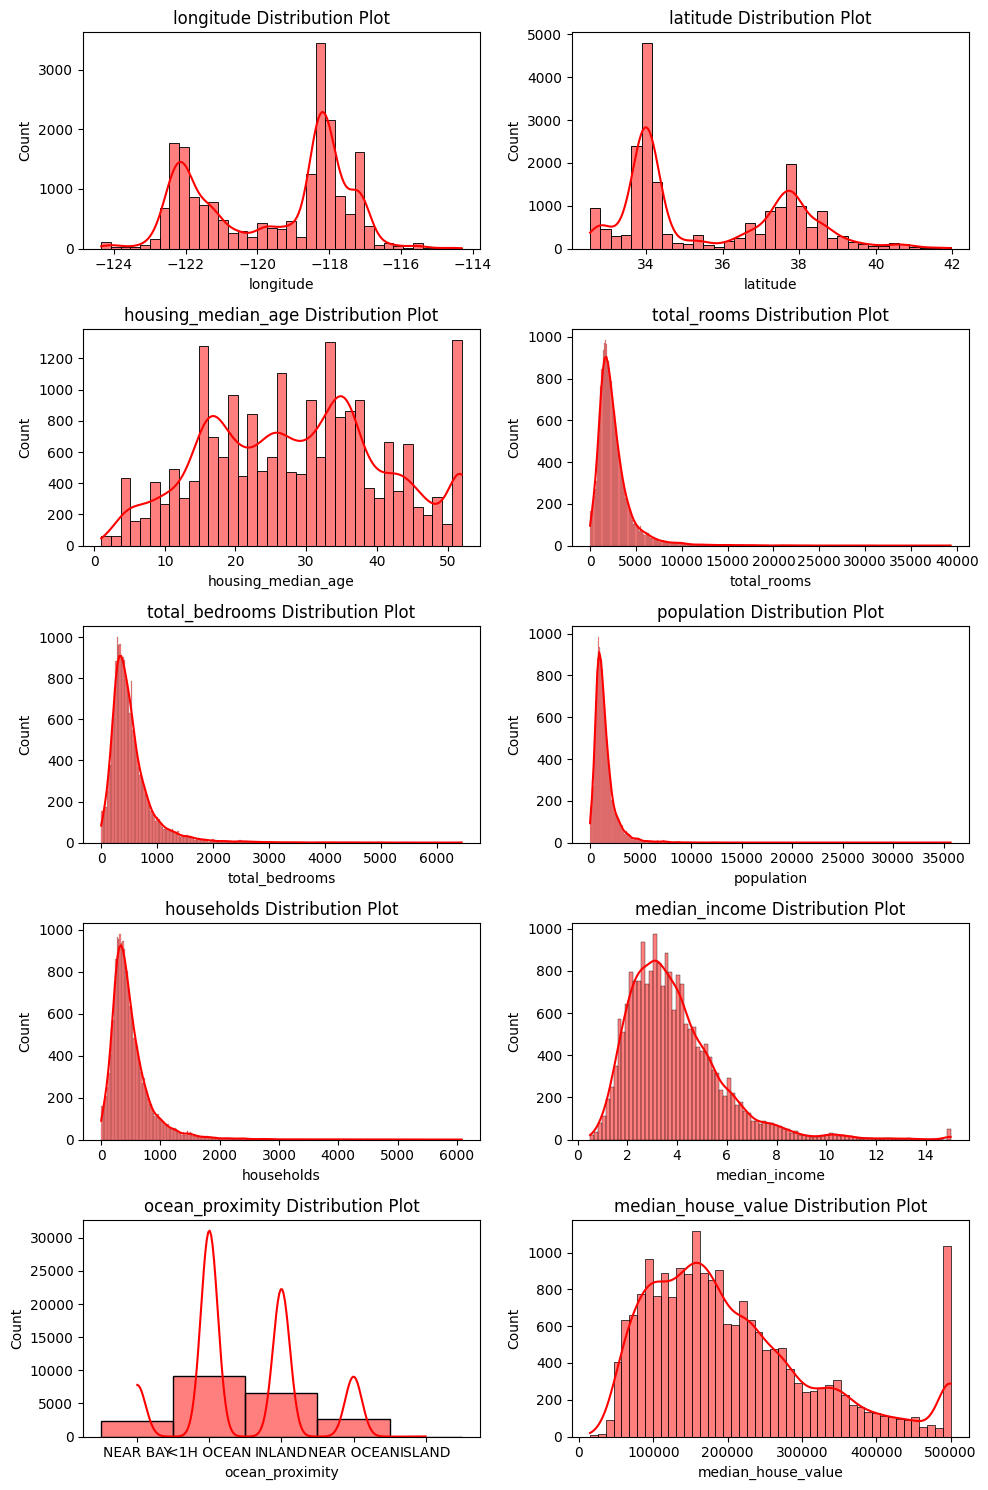

In [41]:
n_rows, n_cols = 5, 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 15))


axes = axes.flatten()

# Loop through columns and plot
for i, column in enumerate(df.columns):
    sns.histplot(df[column], kde=True, ax=axes[i], color = 'Red')
    axes[i].set_title(f"{column} Distribution Plot")

# Adjust layout
plt.tight_layout()
plt.show()